In [1]:
#imports
import numpy as np
from numpy.linalg import norm
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statistics import *
from sklearn.model_selection import train_test_split

#create data frame
smoke_df = pd.read_csv('./smoke.csv') 
smoke_df

#check for missing values
smoke_df.isna().sum()



Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [7]:
#scaling dataframe using mean and standard deviation
# scale = StandardScaler()
# scale.fit(smoke_df)
# smoke_df

#scaling dataframe using minmax scaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(smoke_df)
smoke_df

#dropping UTC and Sno. column
smoke_df.drop(smoke_df.columns[[0,1]], axis=1, inplace=True)

#dividing into X and y
X = smoke_df.drop(columns=['Fire Alarm']).values
X
y_label = smoke_df['Fire Alarm'].values
y_label

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
#split data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2)

In [9]:
def eucledian_distance(x1,x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

def knn(x_train, y_train , x_input, k):
    prediction = []     

    for i in x_input: 
        distance = []
        for j in range(len(x_train)): 
            dist = eucledian_distance(np.array(x_train[j,:]) , i) 
            distance.append(dist) 
        distance = np.array(distance) 

        k_distance = np.argsort(distance)[:k] 
         
        labels = y_train[k_distance]
         
        y_prediction = mode(labels) 
        prediction.append(y_prediction)
 
    return prediction

In [13]:
ypred = knn(Xtrain, ytrain, Xtest,20)
accuracy_score(ytest, ypred)
confusion_matrix(ytest,ypred)

KeyboardInterrupt: 

In [12]:
ypred


[1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,


Confusion Matrix is
 [[3530    3]
 [   2 8991]]


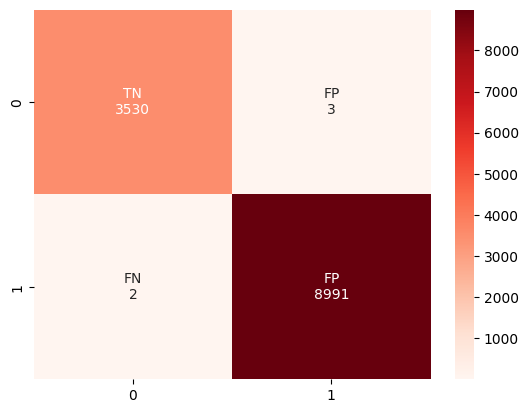

In [48]:
import matplotlib.pyplot as plt
import seaborn as sb

# confusion_matrix = confusion_matrix(ytest, ypred)
# sb.heatmap(confusion_matrix, center=True)
# plt.show()

group_names = ['TN','FP','FN','FP']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Reds')

print('Confusion Matrix is\n', confusion_matrix)

In [50]:
#split training set into training and validation set
Xtrain, Xvalidation, ytrain, yvalidation = train_test_split(Xtrain, ytrain, test_size=0.1)

(4510,)

In [52]:
print("Xtrain.shape",Xtrain.shape)
print("ytrain.shape",ytrain.shape)
print("Xvalidation.shape",Xvalidation.shape)
print("yvalidation.shape",yvalidation.shape)

Xtrain.shape (40583, 11)
ytrain.shape (40583,)
Xvalidation.shape (4510, 11)
yvalidation.shape (4510,)


In [53]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn_cv = KNeighborsClassifier(n_neighbors=4)
cv_scores = cross_val_score(knn_cv, Xtrain, ytrain, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.99975363 0.99975363 0.9992609  1.         0.99975357 0.99926072
 0.99975357 0.99975357 1.         1.        ]
cv_scores mean:0.9997289608632455


In [54]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
nn_values = {'n_neighbors': np.arange(4, 7)}
knn_gscv = GridSearchCV(knn, nn_values, cv=10)

knn_gscv.fit(Xvalidation, yvalidation)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([4, 5, 6])})

In [55]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 4}

In [56]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9993348115299335

In [65]:
from sklearn import metrics

knn_scikit = KNeighborsClassifier(n_neighbors=4)
knn_scikit.fit(Xtrain, ytrain)
ypred = knn_scikit.predict(Xtest)
print("Accuracy- ",metrics.accuracy_score(ytest, ypred))


Accuracy-  0.9996008302730321


In [ ]:

def cosine_similarity(x1,x2):
    return np.dot(x1,x2)/(norm(x1)*norm(x2))
 
def knn(x_train, y_train , x_input, k):
    prediction = []     

    for i in x_input: 
        distance = []
        for j in range(len(x_train)): 
            dist = cosine_similarity(np.array(x_train[j,:]) , i) 
            distance.append(dist) 
        distance = np.array(distance) 

        k_distance = np.argsort(distance)[:k] 
         
        labels = y_train[k_distance]
         
        y_prediction = mode(labels) 
        prediction.append(y_prediction)
 
    return prediction